In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

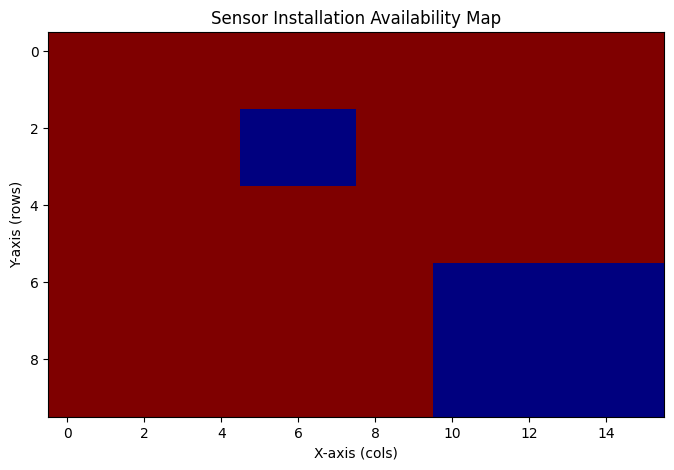

In [2]:
# 10행 x 16열의 맵
H, W = 10, 16

# 전체 1로 초기화 (설치 가능 영역)
sensor_install_map = np.ones((H, W), dtype=np.uint8)

# 임의로 몇 곳을 설치 불가 영역(0)으로 지정해볼게
sensor_install_map[2:4, 5:8] = 0    # 블록 하나
sensor_install_map[6:, 10:] = 0     # 하단 오른쪽

# 시각화
plt.figure(figsize=(8, 5))
plt.imshow(sensor_install_map, cmap='jet')
plt.title("Sensor Installation Availability Map")
plt.xlabel("X-axis (cols)")
plt.ylabel("Y-axis (rows)")
plt.show()

In [3]:


tensor_map = torch.from_numpy(sensor_install_map)
# 텐서 shape 확인
print("Tensor shape:", tensor_map.shape)
print(tensor_map)

Tensor shape: torch.Size([10, 16])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=torch.uint8)


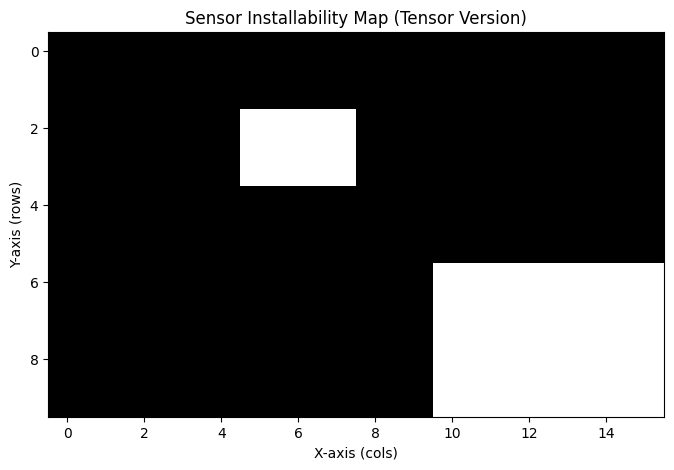

In [4]:
# 텐서를 numpy로 변환해서 시각화
plt.figure(figsize=(8, 5))
plt.imshow(tensor_map.numpy(), cmap='gray_r')
plt.title("Sensor Installability Map (Tensor Version)")
plt.xlabel("X-axis (cols)")
plt.ylabel("Y-axis (rows)")

plt.show()

In [44]:
class SensorMapConv(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv3 = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
        self.conv5 = nn.Conv2d(1, 1, kernel_size=5, padding=2, bias=False)
        self.conv7 = nn.Conv2d(1, 1, kernel_size=7, padding=3, bias=False)

        with torch.no_grad():
            self.conv3.weight.fill_(1/3**2)
            self.conv5.weight.fill_(1/5**2)
            self.conv7.weight.fill_(1/7**2)

    def forward(self, x):
        out3 = self.conv3(x)
        out5 = self.conv5(x)
        out7 = self.conv7(x)
        # 평균 내기 (3x3과 5x5 반반 반영)
        return (out3 + out5 + out7) /3


In [32]:
def show_output(output_tensor, title="After Conv2D"):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 4))
    plt.imshow(output_tensor.squeeze().numpy(), cmap='jet')
    plt.title(title)
    plt.colorbar(label='Activation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [33]:
tensor_map = torch.from_numpy(sensor_install_map).unsqueeze(0).unsqueeze(0).float()
# 결과 shape: [1, 1, 10, 16]
print(tensor_map.shape)  # ✅ torch.Size([1, 1, 10, 16])


torch.Size([1, 1, 10, 16])


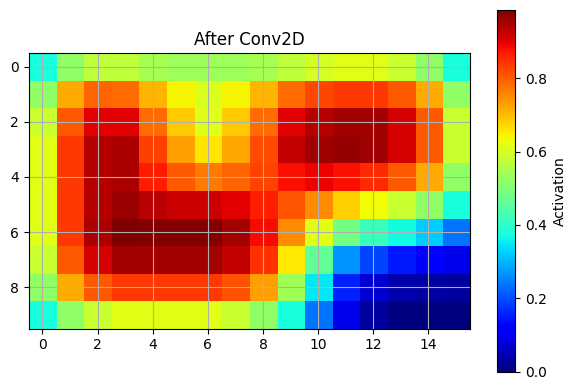

In [ ]:
# 3. Conv 연산 수행
model = SensorMapConv()
with torch.no_grad():
    output_tensor = model(tensor_map)


# 4. 시각화
show_output(output_tensor)

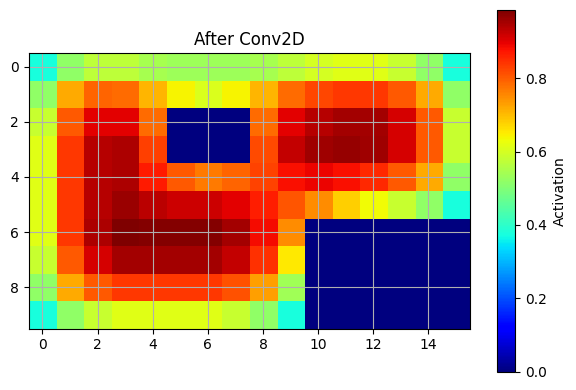

In [46]:
masked_output = tensor_map * output_tensor
# 4. 시각화
show_output(masked_output)